<a href="https://colab.research.google.com/github/LucianoBritis/Data-Analysis-with-Python/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
#Criando o DataFrame
data = pd.read_excel('/content/drive/MyDrive/Datasets/AdventureWorks.xlsx')

In [11]:
#Visualização das 5 primeiras linhas.
data.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
#Rastreando a quantidade de Rows and Cols.
data.shape

(904, 16)

In [12]:
#Rastreio do tipo de dado contido na planila
data.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [13]:
#Receita Total das Vendas.
data['Valor Venda'].sum()

5984606.1426

In [14]:
#Analisando qual foi o custo total das vendas.
data['Custo'] = data['Custo Unitário'].mul(data['Quantidade']) #Create cols 'Custo'.

In [15]:
data.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [16]:
#Qual o custo total ?
data['Custo'].sum()

2486783.05

In [17]:
#Analisando qual foi o lucro total das vendas.
data['Lucro'] = data['Valor Venda'] - data['Custo'] #Create cols 'Lucro'.


In [18]:
data.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [22]:
#Qual foi o tempo de envio para cada produto.
data['Tempo Envio'] = (data['Data Envio'] - data['Data Venda']).dt.days


In [31]:
data.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6


## Agora que temos a diferença acima, podemos analisar a media de tempo de envio para cada Marca

In [24]:
data['Tempo Envio'].dtype

dtype('int64')

In [34]:
#tempo medio de envio por cada marca
data.groupby('Marca')['Tempo Envio'].mean()


Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [32]:
#tempo medio de envio por loja
data.groupby('ID Loja')['Tempo Envio'].mean()

ID Loja
199    8.560261
306    7.964029
307    9.031348
Name: Tempo Envio, dtype: float64

In [35]:
#Rastreio de celulas vazias em cada coluna
data.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [55]:
#Analisando o lucro das vendas por ano e por marca e amazenando em uma variavel
lucro_ano = data.groupby([data['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()

In [57]:
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [52]:
resetando o valor dos numeros para duas casas apos a virgula
pd.options.display.float_format = '{:20,.2f}'.format

In [61]:
#Qual o total de produtos vendidos ? Armazenando na variavel
produtos_vendidos = data.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

In [62]:
produtos_vendidos

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

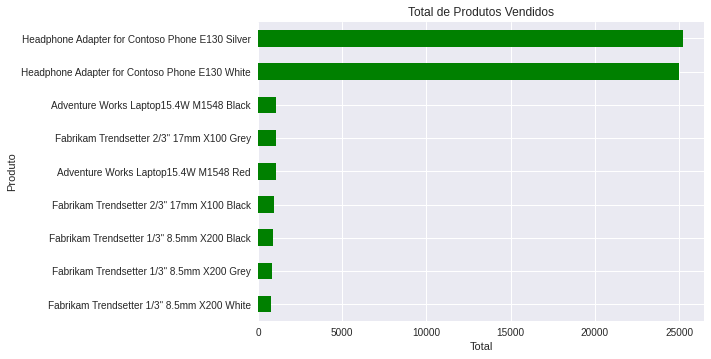

In [69]:
#Grafico com alteração do eixo Y do menor para o maior. 
produtos_vendidos.sort_values(ascending=True).plot.barh(title='Total de Produtos Vendidos', color='green')
plt.xlabel('Total')
plt.ylabel('Produto')

In [71]:
data.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [80]:
##Qual o total de produtos vendidos por ano ? Armazenando na variavel
resumo_ano = data.groupby(data['Data Venda'].dt.year)['Lucro'].sum()



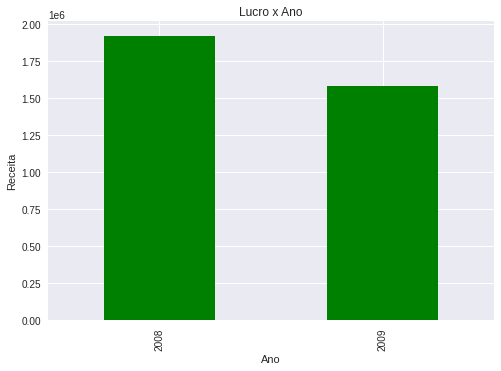

In [86]:
resumo_ano.plot.bar(title='Lucro x Ano', color='green')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [85]:
#Em numeros temos o seguinte:
resumo_ano

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [112]:
#Analise das vendas de 2009
Vendas_2009 = data.loc[(data['Data Venda'].dt.year == 2009)]

In [116]:
Vendas_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


In [118]:
# Armazenando os valores das vendas de 2009 em uma variavel
grafic_line = Vendas_2009.groupby(Vendas_2009['Data Venda'].dt.month)['Lucro'].sum()


Text(0, 0.5, 'Receita')

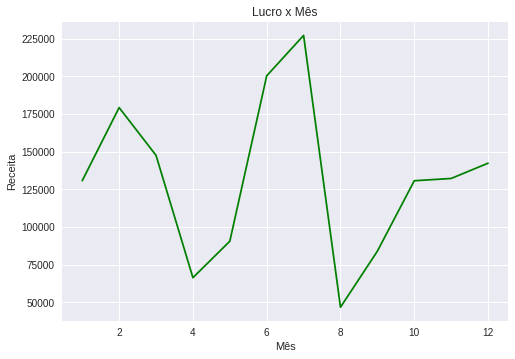

In [124]:
#Grafico das vendas de 2009
grafic_line.plot(title='Lucro x Mês', color='green')
plt.xlabel('Mês')
plt.ylabel('Receita')

In [129]:
#Armazenando o valor de lucro por marca na variavel
vendas_marca = Vendas_2009.groupby('Marca')['Lucro'].sum()

In [131]:
#Armazenando o valor de vendas por classe na variavel
vendas_classe = Vendas_2009.groupby('Classe')['Lucro'].sum()

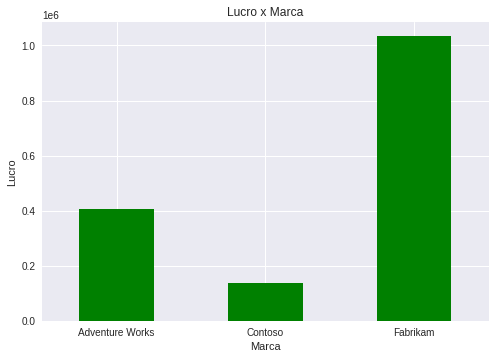

In [141]:
#Grafico de lucro por marca
vendas_marca.plot.bar(title='Lucro x Marca', color='green')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

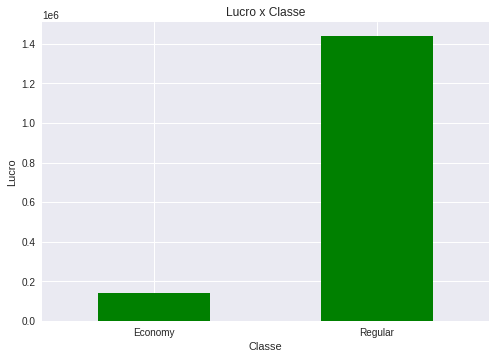

In [142]:
#Grafico de lucro por classe
vendas_classe.plot.bar(title='Lucro x Classe', color='green')
plt.xlabel('Classe')
plt.ylabel('Lucro');
plt.xticks(rotation='horizontal');

#Analise Estatistica baseado no tempo e envio

In [171]:
data['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

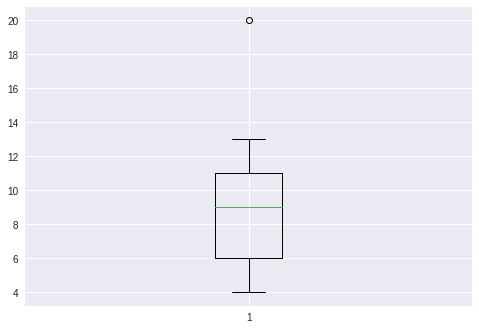

In [174]:
#Grafico de Boxplot
plt.boxplot(data['Tempo Envio']);

Text(0, 0.5, 'y')

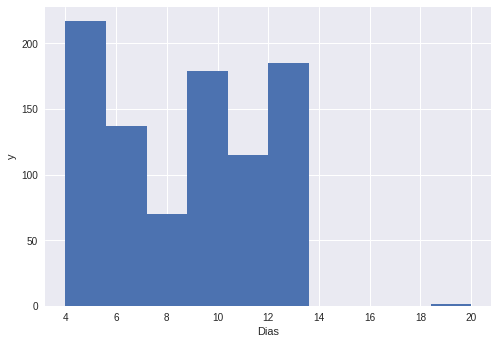

In [181]:
#Grafico de Histogrma
plt.hist(data['Tempo Envio']);
plt.xlabel('Dias')
plt.ylabel('y')

In [178]:
#Tempo minimo envio
data['Tempo Envio'].min()

4

In [182]:
#Listando os produtos com envio em tempo minimo
data[data['Tempo Envio'] == 4]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4
23,2008-06-28,2008-07-02,199,1178,18850,200806284CS627,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",4
27,2008-10-22,2008-10-26,199,1178,18880,200810224CS785,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",4
39,2009-07-13,2009-07-17,306,1178,19070,200907134CS757,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",4
47,2008-05-14,2008-05-18,199,1203,18840,200805144CS609,324.69,980.00,6,0.00,"5,880.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"1,948.14","3,931.86",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,2008-12-29,2009-01-02,306,366,19060,200812293CS676,348.58,758.00,6,909.60,"3,638.40",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"2,091.48","1,546.92",4
892,2008-06-17,2008-06-21,307,1226,19100,200806174CS596,330.99,999.00,6,599.40,"5,394.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,408.66",4
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",4
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.00,6,"1,198.80","4,795.20",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","2,809.26",4


In [183]:
#Saving file 
data.to_csv('Analise_Exploradotoria_novo.csv', index=False)